<a href="https://colab.research.google.com/github/petroniocandido/STPE/blob/main/S%C3%A9ries_Temporais_e_Processos_Estoc%C3%A1sticos_S%C3%A9ries_Multivariadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Séries Multivariadas

**Disciplina:** Tópicos Especiais - Séries Temporais e Processos Estocásticos

**Professor:** <a href="http://petroniocandido.github.io"> Petrônio Cândido de Lima e Silva</a> <span itemscope itemtype="https://schema.org/Person"><a itemprop="sameAs" content="https://orcid.org/0000-0002-1202-2552" href="https://orcid.org/0000-0002-1202-2552" target="orcid.widget" rel="noopener noreferrer" style="vertical-align:top;"><img src="https://orcid.org/sites/default/files/images/orcid_16x16.png" style="width:1em;margin-right:.5em;" alt="ORCID iD icon"></a></span> (petronio.candido@ifnmg.edu.br)

[![made-with-python](https://img.shields.io/badge/Made%20with-Python-1f425f.svg)](https://www.python.org/)  [![made-with-latex](https://img.shields.io/badge/Made%20with-LaTeX-1f425f.svg)](https://www.latex-project.org/) [![ForTheBadge built-with-love](http://ForTheBadge.com/images/badges/built-with-love.svg)](https://GitHub.com/Naereen/) [![ForTheBadge built-with-science](http://ForTheBadge.com/images/badges/built-with-science.svg)](https://GitHub.com/Naereen/)




<center>
  <table><tr>
<td><a href="https://ppgmcs.com.br/"><img src="https://ppgmcs.com.br/wp-content/uploads/ppgmcs.png" alt="Programa de Pós-Graduação em Modelagem Computacional e Sistemas - PPGMCS/Unimontes" height="60" width="150"/></a></td> 

 <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>

<td><a href="#"><img src="https://avatars1.githubusercontent.com/u/54992196?s=400&u=4c96d4fc0560b6957233f1dd91a9560de4a054b2&v=4" alt="{cidic} - Grupo de Pesquisa em Ciência de Dados e Inteligência Computacional" width="100"/></a></td> 

 <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
  
<td>
   <a href="http://www.ifnmg.edu.br/"><img src="https://github.com/petroniocandido/PhdThesis/raw/master/figures/ifnmg.jpg" alt="IFNMG - Instituto Federal do Norte de Minas Gerais" width="100"/></a></td>
</tr>
</table>
</center>

[![licensebuttons by-nc-sa](https://licensebuttons.net/l/by-nc-sa/3.0/88x31.png)](https://creativecommons.org/licenses/by-nc-sa/4.0) 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## Dados

### Temperatura e Consumo Energético na Malásia

In [ ]:
st1 = pd.read_csv("https://query.data.world/s/e5arbthdytod3m7wfcg7gmtluh3wa5", sep=';', nrows=5000)
st1.head()

,time,temperature,load
0,01/01/09 01:00 AM,24,30360
1,01/01/09 02:00 AM,24,29155
2,01/01/09 03:00 AM,24,28086
3,01/01/09 04:00 AM,24,28031
4,01/01/09 05:00 AM,24,27730


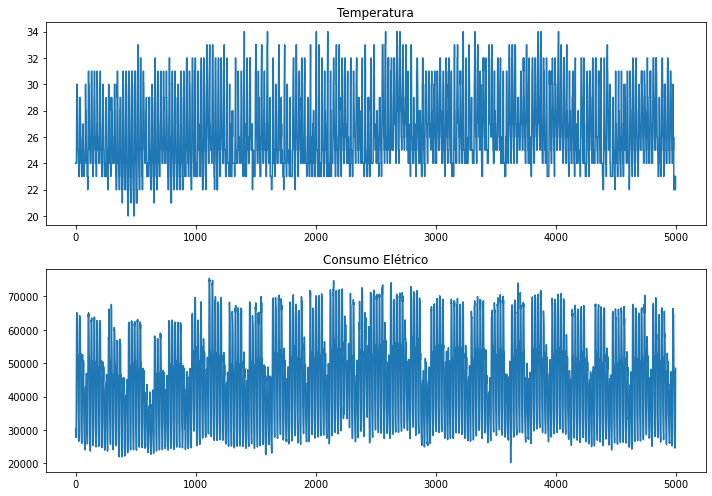

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1,figsize=[10,7])

ax[0].plot(st1['temperature'].values)
ax[0].set_title("Temperatura")
ax[1].plot(st1['load'].values)
ax[1].set_title("Consumo Elétrico")

plt.tight_layout()

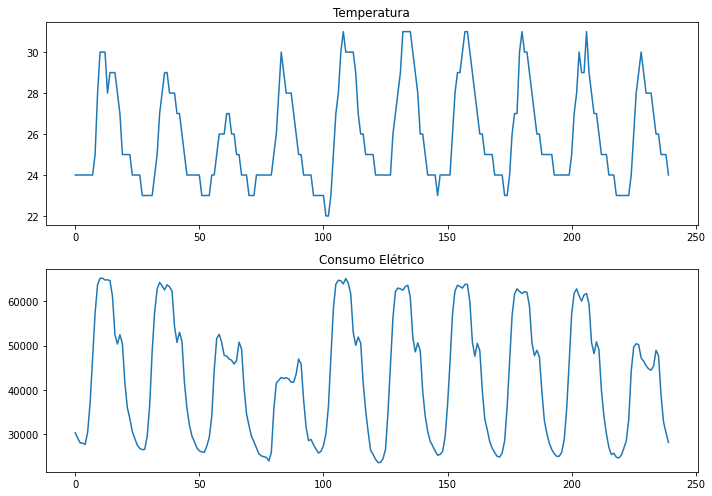

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1,figsize=[10,7])

ax[0].plot(st1['temperature'].values[:240])
ax[0].set_title("Temperatura")
ax[1].plot(st1['load'].values[:240])
ax[1].set_title("Consumo Elétrico")

plt.tight_layout()

### Inflação Mensal e Vendas do Varejo no Brasil (IBGE)

In [ ]:
st2 = pd.read_csv('https://query.data.world/s/sft75rrzigqwxzfmomn356nmuytu73', sep=';')
st2.head()

,DATA,IPCA,VENDAS_VAREJO
0,01/01/2000,0.62,46.0
1,01/02/2000,0.13,46.5
2,01/03/2000,0.22,48.5
3,01/04/2000,0.42,48.5
4,01/05/2000,0.01,50.5


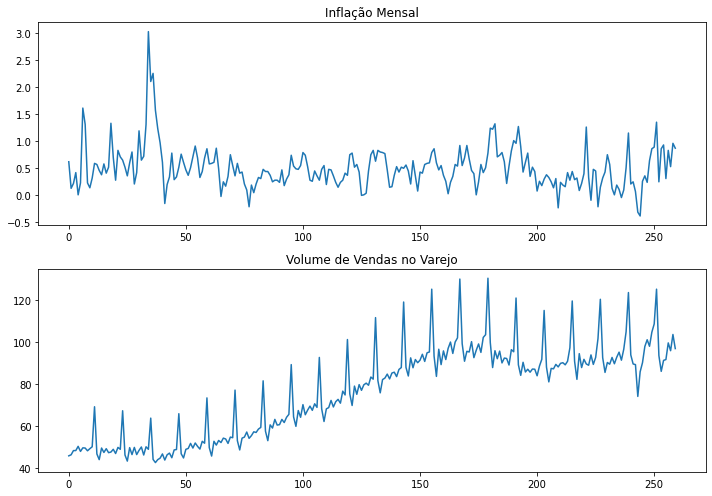

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1,figsize=[10,7])

ax[0].plot(st2['IPCA'].values)
ax[0].set_title("Inflação Mensal")
ax[1].plot(st2['VENDAS_VAREJO'].values)
ax[1].set_title("Volume de Vendas no Varejo")

plt.tight_layout()

### Variação do PIB e Comércio Exterior no BRASIL (IBGE)

In [ ]:
st3 = pd.read_csv('https://query.data.world/s/ruidk67gd2pdlt7masf25z3lsbttp2', sep=';')
st3.head()

,TRIMESTRE,PIB,EXPORTACAO,IMPORTACAO
0,1º trimestre 1996,2.5,12306,14773
1,2º trimestre 1996,2.1,14576,17470
2,3º trimestre 1996,2.3,15560,20928
3,4º trimestre 1996,2.2,15085,22949
4,1º trimestre 1997,3.2,13162,19333


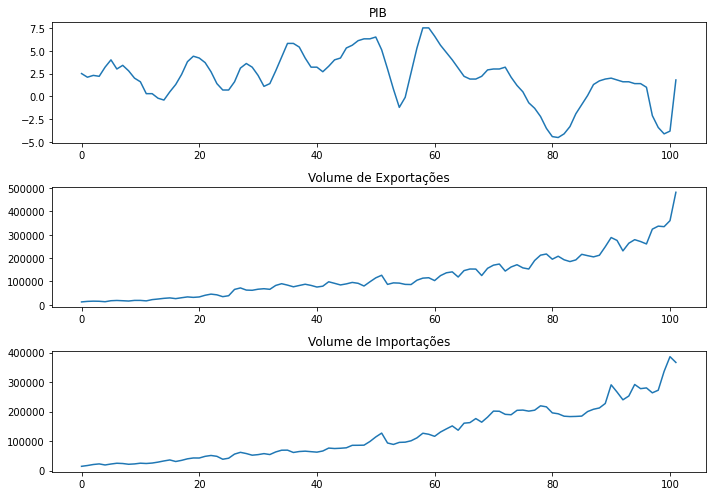

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=1,figsize=[10,7])

ax[0].plot(st3['PIB'].values)
ax[0].set_title("PIB")
ax[1].plot(st3['EXPORTACAO'].values)
ax[1].set_title("Volume de Exportações")
ax[2].plot(st3['IMPORTACAO'].values)
ax[2].set_title("Volume de Importações")

plt.tight_layout()

## AutoCovariância e AutoCorrelação Cruzada

In [ ]:
def Var(X):
  n = len(X)
  mx = np.mean(X)
  c = np.mean([(x - mx)**2 for x in X])
  return c

def AutoCov(X, k):
  n = len(X)
  mx = np.mean(X)
  c = np.zeros(n-k)
  for i in range(n - k):
    c[i] = (X[i] - mx)*(X[i+k] - mx)
  c = c.mean()
  
  return c

def CrossCov(X, Y, k):
  n = len(X)
  mx = np.mean(X)
  my = np.mean(Y)
  c = np.zeros(n-k)
  for i in range(n - k):
    c[i] = (X[i] - mx)*(Y[i+k] - my)
  c = c.mean()
  
  return c

def ACF(X, k):
  gamma_k = AutoCov(X, k)
  gamma_0 = Var(X)
  return gamma_k / gamma_0

def CCF(X, Y, k):
  gamma_xy = CrossCov(X, Y, k)
  gamma_x = Var(X)
  gamma_y = Var(Y)
  return gamma_xy / np.sqrt(gamma_x * gamma_y)


In [ ]:
def plot_acf(X, k, **kwargs):
  acf = []
  for i in range(k):
    acf.append(ACF(X, i))

  ax = kwargs.get("axis", None)
  if ax is None:
    fig, ax = plt.subplots(nrows=1, ncols=1,figsize=[10,5])

  ax.hlines([0],[0],[k], color="black")
  ax.vlines([i for i in range(k)], [0 for i in range(k)], acf, color="red")
  ax.scatter([i for i in range(k)], acf, marker="*")
  ax.set_xlabel("k")
  ax.set_ylabel("ACF(k)")

def plot_ccf(X, Y, k, **kwargs):
  ccf = []
  for i in range(k):
    ccf.append(CCF(X, Y,  i))

  ax = kwargs.get("axis", None)
  if ax is None:
    fig, ax = plt.subplots(nrows=1, ncols=1,figsize=[10,5])

  ax.hlines([0],[0],[k], color="black")
  ax.vlines([i for i in range(k)], [0 for i in range(k)], ccf, color="red")
  ax.scatter([i for i in range(k)], ccf, marker="*")
  ax.set_xlabel("k")
  ax.set_ylabel("CCF(k)")

### Malásia

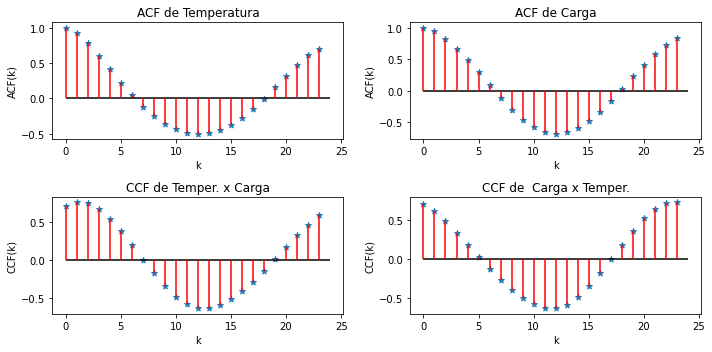

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=[10,5])

ax[0][0].set_title('ACF de Temperatura')
plot_acf(st1['temperature'].values, 24, axis=ax[0][0])
ax[0][1].set_title('ACF de Carga')
plot_acf(st1['load'].values, 24, axis=ax[0][1])
ax[1][0].set_title('CCF de Temper. x Carga')
plot_ccf(st1['load'].values, st1['temperature'].values, 24, axis=ax[1][0])
ax[1][1].set_title('CCF de  Carga x Temper.')
plot_ccf(st1['temperature'].values, st1['load'].values, 24, axis=ax[1][1])

plt.tight_layout()

### Inflação e Varejo

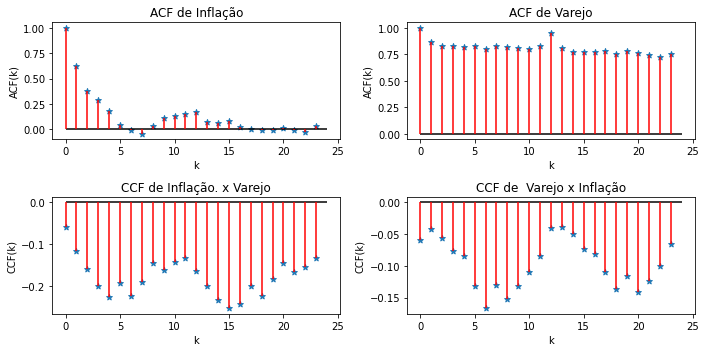

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=[10,5])

ax[0][0].set_title('ACF de Inflação')
plot_acf(st2['IPCA'].values, 24, axis=ax[0][0])
ax[0][1].set_title('ACF de Varejo')
plot_acf(st2['VENDAS_VAREJO'].values, 24, axis=ax[0][1])
ax[1][0].set_title('CCF de Inflação. x Varejo')
plot_ccf(st2['IPCA'].values, st2['VENDAS_VAREJO'].values, 24, axis=ax[1][0])
ax[1][1].set_title('CCF de  Varejo x Inflação')
plot_ccf(st2['VENDAS_VAREJO'].values, st2['IPCA'].values, 24, axis=ax[1][1])

plt.tight_layout()

### PIB e Comércio Exterior

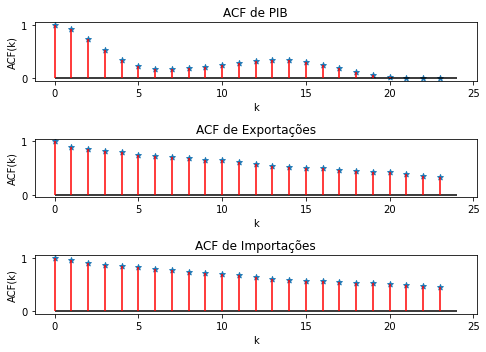

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=1,figsize=[7,5])

ax[0].set_title('ACF de PIB')
plot_acf(st3['PIB'].values, 24, axis=ax[0])
ax[1].set_title('ACF de Exportações')
plot_acf(st3['EXPORTACAO'].values, 24, axis=ax[1])
ax[2].set_title('ACF de Importações')
plot_acf(st3['IMPORTACAO'].values, 24, axis=ax[2])

plt.tight_layout()

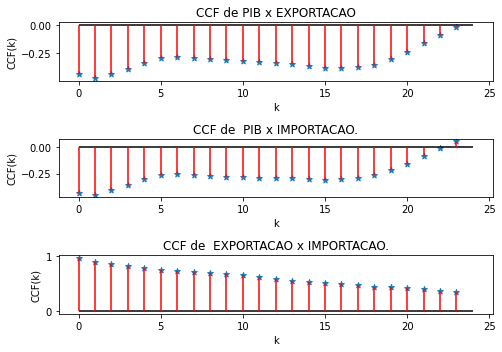

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=1,figsize=[7,5])

ax[0].set_title('CCF de PIB x EXPORTACAO')
plot_ccf(st3['PIB'].values, st3['EXPORTACAO'].values, 24, axis=ax[0])
ax[1].set_title('CCF de  PIB x IMPORTACAO.')
plot_ccf(st3['PIB'].values, st3['IMPORTACAO'].values, 24, axis=ax[1])
ax[2].set_title('CCF de  EXPORTACAO x IMPORTACAO.')
plot_ccf(st3['EXPORTACAO'].values, st3['IMPORTACAO'].values, 24, axis=ax[2])

plt.tight_layout()


## Modelos com Variáveis Exógenas

In [ ]:
def lags(dados, p):
  n = len(dados)
  X = np.zeros((n-p, p))
  Y = dados[p:]
  for i in range(p, n):
    X[i-p,:] = dados[i-p:i]
  return X,Y

def ajustar_ar(dados, parametros):
  p = parametros[0]
  X,Y = lags(dados, p)
  coef = np.linalg.inv(X.T.dot(X)).dot( X.T.dot(Y) )
  return coef 

def ar(dados, coef):
  p = len(coef)
  n = len(dados)
  ret = np.zeros(n-p)
  for i in range(p,n):
    ret[i-p] = dados[i-p:i].dot(coef)

  return ret


In [ ]:
def lags_x(endog, exog, k):
  t = len(endog)
  n = len(exog)
  X = np.zeros((t-k, (n+1)*k))
  Y = endog[k:]
  for i in range(k, t):
    X[i-k,0:k] = endog[i-k:i]
    for e in range(n):
      X[i-k,(e+1)*k:(e+2)*k] = exog[e][i-k:i]
  return X,Y

def ajustar_arx(endog, exog, parametros):
  p = parametros[0]
  X,Y = lags_x(endog, exog, p)

  coef = np.linalg.inv(X.T @ X) @ (X.T @ Y )

  previsoes = arx(endog, exog, [coef, None])
  
  residuos = endog[p:] - previsoes

  sigma2 = np.std(residuos)

  return coef, sigma2 

def arx(endog, exog, parametros):
  coef, _ = parametros
  t = len(endog)
  n = len(exog)
  p = int(len(coef) / (n+1))
  ret = np.zeros(t-p)
  X, _ = lags_x(endog, exog, p)
  for i in range(p,t):
    ret[i-p] = X[i-p].dot(coef)

  return ret


### Malásia

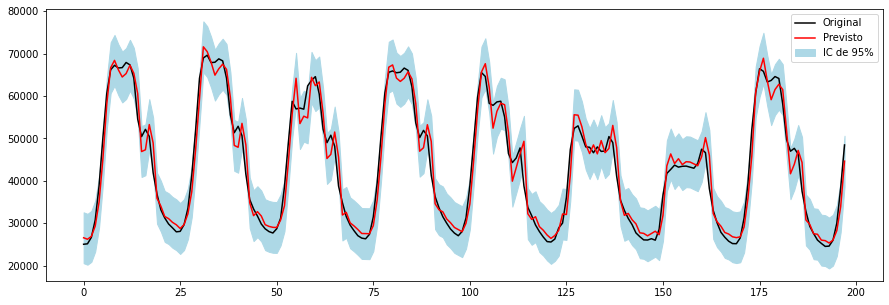

In [ ]:
treino = st1.iloc[0:4500]
teste = st1.iloc[4800:]

p = 2

parametros = ajustar_arx(treino['load'].values, [  treino['temperature'].values ], [p])

sigma = parametros[-1]

previsoes = arx(teste['load'].values, [  teste['temperature'].values ], parametros)

fig, ax = plt.subplots(1,1,figsize=(15,5))

ax.plot(teste['load'].values[p:], c='black', label='Original')

ax.plot(previsoes, c='red', label='Previsto')

ax.fill_between(range(0, len(previsoes)), previsoes - 2*sigma, previsoes + 2*sigma, 
                color='lightblue', label='IC de 95%')

plt.legend()

### Inflação e Varejo

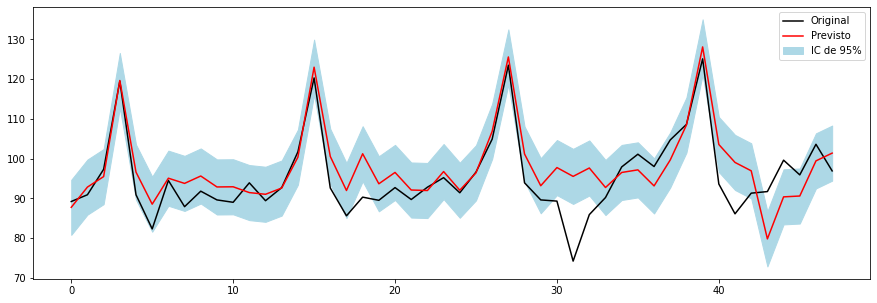

In [ ]:
treino = st2.iloc[0:200]
teste = st2.iloc[200:]

p = 12

parametros = ajustar_arx(treino['VENDAS_VAREJO'].values, [  treino['IPCA'].values ], [p])

sigma = parametros[-1]

previsoes = arx(teste['VENDAS_VAREJO'].values, [  teste['IPCA'].values ], parametros)

fig, ax = plt.subplots(1,1,figsize=(15,5))

ax.plot(teste['VENDAS_VAREJO'].values[p:], c='black', label='Original')

ax.plot(previsoes, c='red', label='Previsto')

ax.fill_between(range(0, len(previsoes)), previsoes - 2*sigma, previsoes + 2*sigma, 
                color='lightblue', label='IC de 95%')

plt.legend()

### PIB e Comércio Exterior

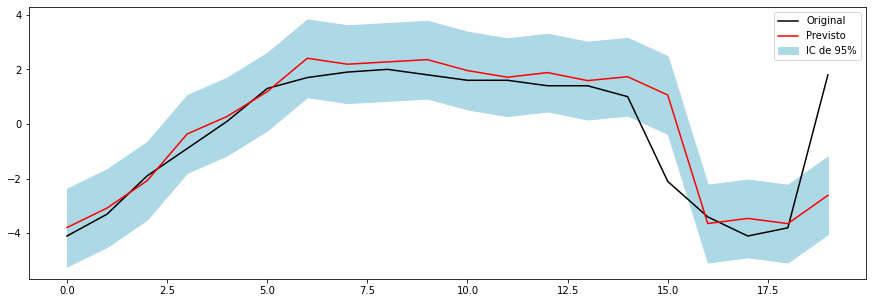

In [ ]:
treino = st3.iloc[0:80]
teste = st3.iloc[80:]

p = 2

parametros = ajustar_arx(treino['PIB'].values, [  treino['EXPORTACAO'].values ], [p])

sigma = parametros[-1]

previsoes = arx(teste['PIB'].values, [  teste['EXPORTACAO'].values ], parametros)

fig, ax = plt.subplots(1,1,figsize=(15,5))

ax.plot(teste['PIB'].values[p:], c='black', label='Original')

ax.plot(previsoes, c='red', label='Previsto')

ax.fill_between(range(0, len(previsoes)), previsoes - 2*sigma, previsoes + 2*sigma, 
                color='lightblue', label='IC de 95%')

plt.legend()

## Séries Multivariadas / Processos Estocásticos Vetoriais

In [ ]:
def lags_v(dados, p):
  T, n = dados.shape
  X = np.zeros((T-p, n*p))
  Y = dados[p:, :]
  for i in range(p, T):
    for j in range(p):
      X[i - p, j*n:(j*n)+n] = dados[i-(p-j), : ]
  return X, Y

def var(dados, parametros):
  T, n = dados.shape
  coef, _ = parametros
  p = int(coef.shape[0]/n)
  X,_ = lags_v(dados, p)
  ret = np.zeros((T-p, n))
  for i in range(T-p):
    ret[i, :] = coef.T @ X[i, :] 
  return ret 

def ajustar_var(dados, p):
  X,Y = lags_v(dados, p)
  
  coef = np.linalg.inv(X.T @ X) @ ( X.T @ Y )

  previsoes = var(dados, [coef, None])

  residuos = dados[p:, :] - previsoes

  Sigma = np.sqrt(np.cov(residuos, rowvar=False))

  return coef, Sigma


In [ ]:
Z = np.array([[1,1],[2,2],[3,3],[4,4],[5,5]])

X,Y = lags_v(Z, 2)
X

array([[1., 1., 2., 2.],
       [2., 2., 3., 3.],
       [3., 3., 4., 4.]])

In [ ]:
Y

array([[3, 3],
       [4, 4],
       [5, 5]])

### Malásia

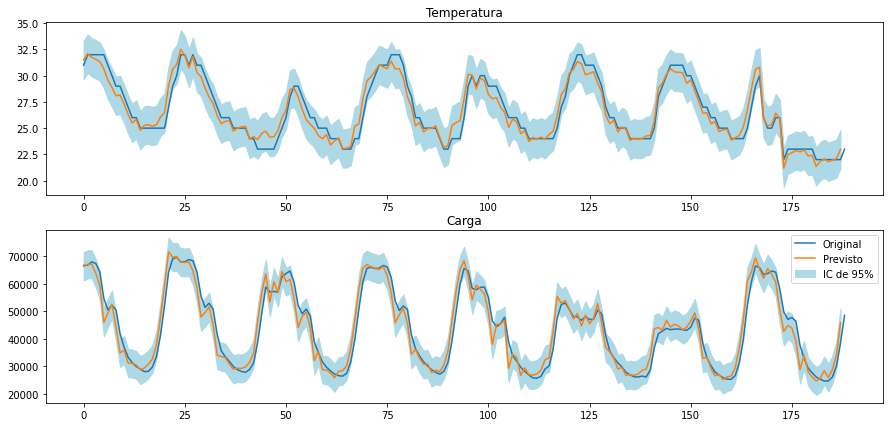

In [ ]:
treino = st1[['temperature','load']].values[:4800]
teste = st1[['temperature','load']].values[4800:]

p = 12

param = ajustar_var(treino, p)

sigma = param[-1]

previsoes = var(teste, param)

fig, ax = plt.subplots(2, 1, figsize=(15,7))

T = teste.shape[0]

ax[0].set_title('Temperatura')
ax[0].plot(teste[p-1:, 0], label='Original')
ax[0].plot(previsoes[:, 0], label='Previsto')
ax[0].fill_between(range(0,T-p), previsoes[:, 0] - 2*sigma[0,0], previsoes[:, 0] + 2*sigma[0,0],
                   color='lightblue', label='IC de 95%')

ax[1].set_title('Carga')
ax[1].plot(teste[p-1:, 1], label='Original')
ax[1].plot(previsoes[:, 1], label='Previsto')
ax[1].fill_between(range(0,T-p), previsoes[:, 1] - 2*sigma[1,1], previsoes[:, 1] + 2*sigma[1,1],
                   color='lightblue', label='IC de 95%')


plt.legend()

### Inflação e Varejo

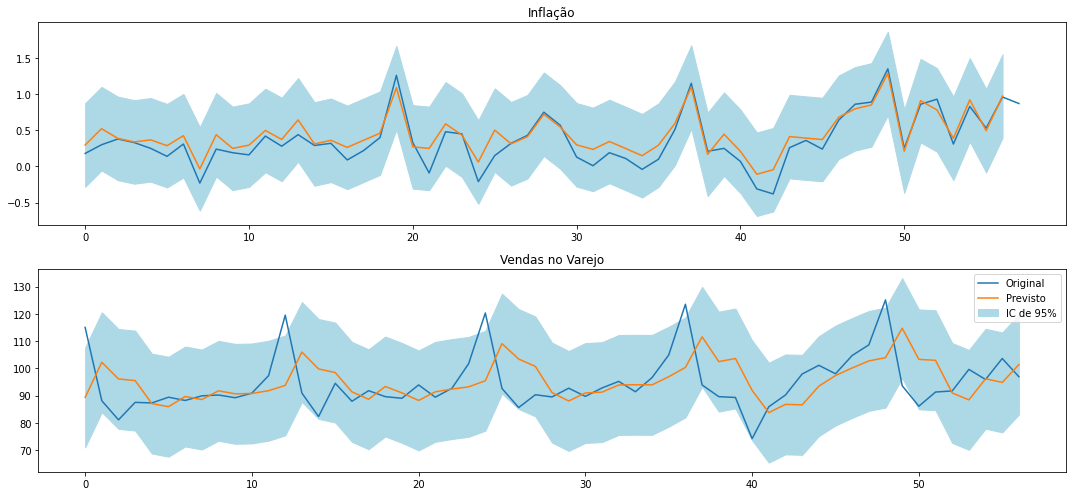

In [ ]:
treino = st2[['IPCA','VENDAS_VAREJO']].values[:200]
teste = st2[['IPCA','VENDAS_VAREJO']].values[200:]

p = 3

param = ajustar_var(treino, p)

sigma = param[-1]

previsoes = var(teste, param)

fig, ax = plt.subplots(2, 1, figsize=(15,7))

T = teste.shape[0]

ax[0].set_title('Inflação')
ax[0].plot(teste[p-1:, 0], label='Original')
ax[0].plot(previsoes[:, 0], label='Previsto')
ax[0].fill_between(range(0,T-p), previsoes[:, 0] - 2*sigma[0,0], previsoes[:, 0] + 2*sigma[0,0],
                   color='lightblue', label='IC de 95%')

ax[1].set_title('Vendas no Varejo')
ax[1].plot(teste[p:, 1], label='Original')
ax[1].plot(previsoes[:, 1], label='Previsto')
ax[1].fill_between(range(0,T-p), previsoes[:, 1] - 2*sigma[1,1], previsoes[:, 1] + 2*sigma[1,1],
                   color='lightblue', label='IC de 95%')


plt.legend()
plt.tight_layout()


### PIB e Comércio Exterior

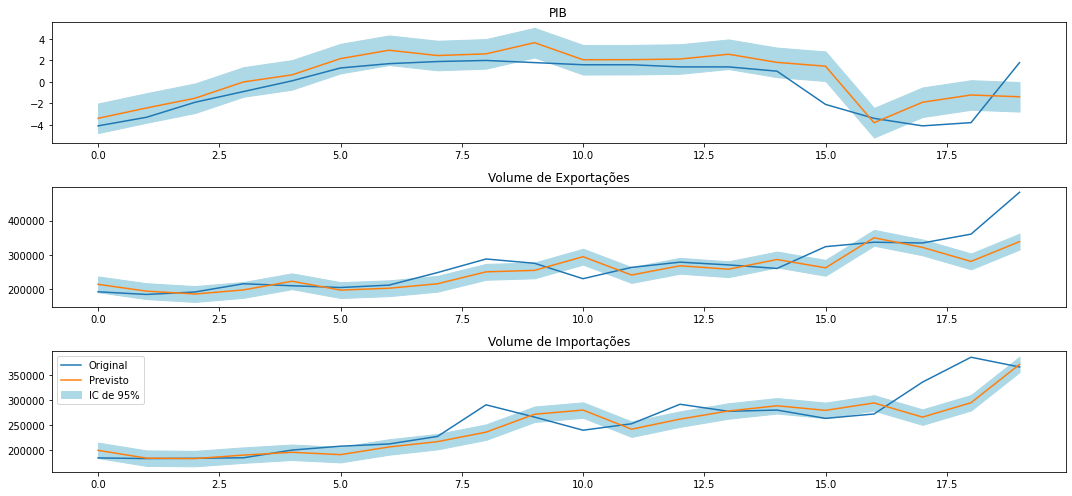

In [ ]:
treino = st3[['PIB','EXPORTACAO','IMPORTACAO']].values[:80]
teste = st3[['PIB','EXPORTACAO','IMPORTACAO']].values[80:]

p = 2

param = ajustar_var(treino, p)

sigma = param[-1]

previsoes = var(teste, param)

fig, ax = plt.subplots(3, 1, figsize=(15,7))

T = teste.shape[0]

ax[0].set_title('PIB')
ax[0].plot(teste[p:, 0], label='Original')
ax[0].plot(previsoes[:, 0], label='Previsto')
ax[0].fill_between(range(0,T-p), previsoes[:, 0] - 2*sigma[0,0], previsoes[:, 0] + 2*sigma[0,0],
                   color='lightblue', label='IC de 95%')

ax[1].set_title('Volume de Exportações')
ax[1].plot(teste[p:, 1], label='Original')
ax[1].plot(previsoes[:, 1], label='Previsto')
ax[1].fill_between(range(0,T-p), previsoes[:, 1] - 2*sigma[1,1], previsoes[:, 1] + 2*sigma[1,1],
                   color='lightblue', label='IC de 95%')

ax[2].set_title('Volume de Importações')
ax[2].plot(teste[p:, 2], label='Original')
ax[2].plot(previsoes[:, 2], label='Previsto')
ax[2].fill_between(range(0,T-p), previsoes[:, 2] - 2*sigma[2,2], previsoes[:, 2] + 2*sigma[2,2],
                   color='lightblue', label='IC de 95%')

plt.legend()
plt.tight_layout()


(array([[3., 3., 2., 2.],
        [4., 4., 3., 3.]]), array([[3, 3],
        [4, 4]]))